In [2]:
import cv2
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

1   HIToolbox                           0x000000018d8e85c8 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 120
2   HIToolbox                           0x000000018d8e8188 _ZN15MenuBarInstance14EnableAutoShowEv + 60
3   HIToolbox                           0x000000018d88b310 SetMenuBarObscured + 372
4   HIToolbox                           0x000000018d88aee8 _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 172
5   HIToolbox                           0x000000018d884fcc _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 296
6   HIToolbox                           0x000000018d84bcd0 _NotifyEventLoopObservers + 176
7   HIToolbox                           0x000000018d88496c AcquireEventFromQueue + 432
8   HIToolbox                           0x000000018d873c84 ReceiveNextEventCommon + 320
9   HIToolbox                           0x000000018d873b2c _BlockUntilNextEventMatchingListInModeWithFilter + 72
10  AppKit                              0x000000018741984c _DPS

Image saved as ro.jpg.
ro User face added!


/var/folders/pq/10ytbdq13qx7cm5dyhtddgz80000gn/T/ipykernel_73103/4196975125.py:61: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


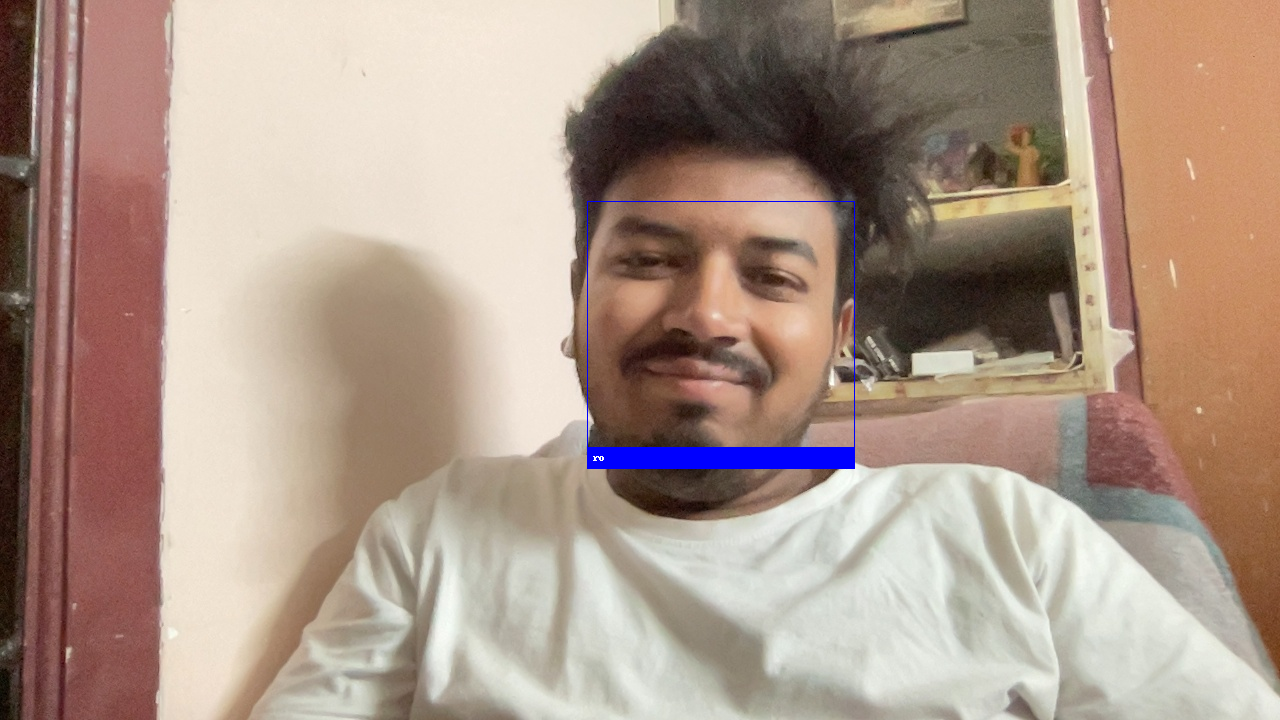

In [3]:
name = input("Enter your name: ")
known_face_encodings = []
face_names = []

def take_and_save_image(name):

    cam = cv2.VideoCapture(0)
    while True:
        ret, frame = cam.read()
        
        # Display the frame
        cv2.imshow('frame', frame)
        

        if cv2.waitKey(1) == ord('q'):
            
            filename = f"{name}.jpg"
            cv2.imwrite(filename, frame)
            print(f"Image saved as {filename}.")
            break
    cam.release()


def scan_user(name):
    image = face_recognition.load_image_file(f"{name}.jpg")
    face_encoding = face_recognition.face_encodings(image)[0]
    known_face_encodings.append(face_encoding)
    face_names.append(name)
    print(f'{name} User face added!')

def find_face(name):
    image=f"{name}.jpg"
    unknown_image = face_recognition.load_image_file(image)
# Find all the faces and face encodings in the unknown image
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
    # See http://pillow.readthedocs.io/ for more about PIL/Pillow
    pil_image = Image.fromarray(unknown_image)
    # Create a Pillow ImageDraw Draw instance to draw with
    draw = ImageDraw.Draw(pil_image)

    # Loop through each face found in the unknown image
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name = "Unknown"

        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = face_names[best_match_index]

        # Draw a box around the face using the Pillow module
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

        # Draw a label with a name below the face
        text_width, text_height = draw.textsize(name)
        draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
        draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


    # Remove the drawing library from memory as per the Pillow docs
    del draw

    # Display the resulting image
    display(pil_image)
    
name="ro"
take_and_save_image(name)
scan_user(name)
find_face(name)
